<AxesSubplot:>

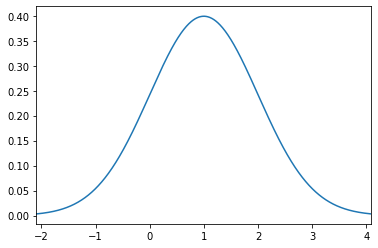

In [7]:
from filterpy.stats import plot_gaussian_pdf
import kf_book.book_plots as book_plots
import numpy as np
import matplotlib.pyplot as plt
from filterpy.stats import gaussian

plot_gaussian_pdf(mean=1.0, variance=1**2)

[0.04597701 0.02298851 0.         0.08045977 0.02298851 0.13793103
 0.40229885 0.22988506 0.03448276 0.02298851]
[0.02803738 0.03738318 0.00934579 0.03738318 0.01869159 0.35514019
 0.18691589 0.1682243  0.00934579 0.14953271]
[0.00748596 0.00499064 0.         0.01746725 0.00249532 0.28446663
 0.43668122 0.22457891 0.00187149 0.01996257]


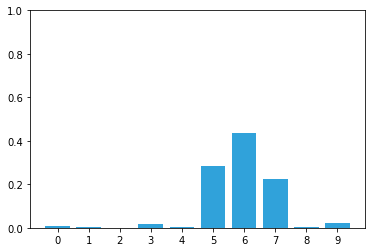

In [8]:
def normalize(p):
    return p / sum(p)

def update(likelihood, prior):
    return normalize(likelihood * prior)

prior =      normalize(np.array([4, 2, 0, 7, 2, 12, 35, 20, 3, 2]))
print(prior)
likelihood = normalize(np.array([3, 4, 1, 4, 2, 38, 20, 18, 1, 16]))
print(likelihood)
posterior = update(likelihood, prior)
print(posterior)
book_plots.bar_plot(posterior)

[0.00748596 0.00499064 0.         0.01746725 0.00249532 0.28446663
 0.43668122 0.22457891 0.00187149 0.01996257]
mean: 5.88 var: 1.24


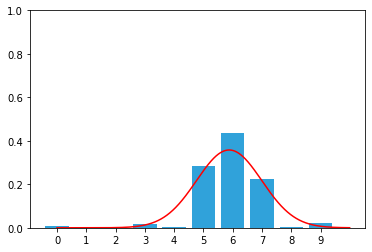

In [9]:
xs = np.arange(0, 10, .01)

def mean_var(p):
    x = np.arange(len(p))
    mean = np.sum(p * x,dtype=float)
    var = np.sum((x - mean)**2 * p)
    return mean, var

print(posterior)
mean, var = mean_var(posterior)
book_plots.bar_plot(posterior)
plt.plot(xs, gaussian(xs, mean, var, normed=False), c='r');
print('mean: %.2f' % mean, 'var: %.2f' % var)